In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import random
import tensorflow as tf
import cv2

In [2]:
TRAIN_DIR = 'input/train/'
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]
train_dogs = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
train_cats = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'cat' in i]

In [3]:
train_images_partial = train_dogs[:100] +train_cats[:100]
random.shuffle(train_images_partial)

In [91]:
feature = []
for img in train_images_partial:
    img = cv2.imread(img)
    img = cv2.resize(img, dsize=(64,64))
    feature.append(img)
feature=np.array(feature)

In [156]:
label = ['cat' if 'cat' in i else 'dog' for i in train_images_partial]
label=[[0, 1] if i=='cat' else [1, 0] for i in label]
label=np.int32(label)

In [147]:
feature=np.int32(feature)

In [152]:
feature = (feature-np.min(feature))/(np.max(feature)-np.min(feature))

In [159]:
label.dtype

dtype('int32')

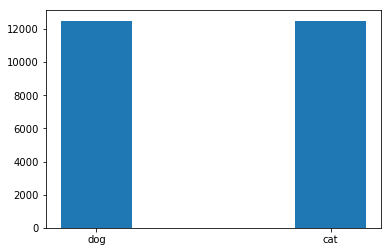

In [16]:
plt.bar([1,2], [len(train_dogs), len(train_cats)], width=0.3)
plt.xticks([1,2],['dog', 'cat'])
plt.savefig('dogvscat.jpg',dpi=200)

In [160]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    
    return tf.placeholder(tf.float32, shape=(None, image_shape[0], image_shape[1], image_shape[2]), name='x')


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, shape=(None, n_classes), name='y')


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, name='keep_prob')

In [161]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    weight =  tf.Variable(tf.random_normal(conv_ksize+(x_tensor.shape[-1].value,)+(conv_num_outputs,),
                                           stddev=0.05))
    bias = tf.Variable(tf.zeros([conv_num_outputs]))
    x = tf.nn.conv2d(x_tensor, weight, strides=(1,)+conv_strides+(1,), padding='SAME')
    x = tf.nn.bias_add(x, bias)
    x = tf.nn.relu(x)
    x = tf.nn.max_pool(x, ksize=((1,)+ pool_ksize + (1,)),
                      strides=((1,)+ pool_strides + (1,)),
                      padding='SAME')
    return x 

In [162]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    flatten_x = tf.reshape(x_tensor, 
                           shape=[tf.shape(x_tensor)[0], x_tensor.shape[1].value*x_tensor.shape[2].value*x_tensor.shape[3].value])
    return flatten_x

In [163]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    weight = tf.Variable(tf.truncated_normal((x_tensor.shape[-1].value, num_outputs),
                                            stddev = 0.05))
    bias = tf.Variable(tf.zeros([num_outputs]))
    fc_x = tf.add(tf.matmul(x_tensor, weight), bias)
    fc_x = tf.nn.relu(fc_x)
    
    return fc_x

In [164]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    weight = tf.Variable(tf.truncated_normal([x_tensor.shape[-1].value,num_outputs],
                                            stddev=0.05))
    bias = tf.Variable(tf.zeros([num_outputs]))
    return tf.add(tf.matmul(x_tensor, weight), bias)

In [176]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    conv = conv2d_maxpool(x, 32, (4,4), (1,1), (3,3), (2,2))

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    flt = flatten(conv)

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    fc = fully_conn(flt, 512)
    fc = tf.nn.dropout(fc, keep_prob)
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    
    # TODO: return output
    return output(fc, 2)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((64, 64, 3))
y = neural_net_label_input(2)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

In [166]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    session.run(optimizer, feed_dict={
            x: feature_batch,
            y: label_batch,
            keep_prob: keep_probability
        })
        
    pass

In [167]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    loss = session.run(cost, feed_dict={
            x: feature_batch,
            y: label_batch,
            keep_prob: 1.
        })
    global valid_features, valid_labels
    valid_acc = session.run(accuracy, feed_dict={
            x: feature,
            y: label,
            keep_prob: 1.
        })
    print('Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(loss, valid_acc))
    pass

In [169]:
# TODO: Tune Parameters
epochs = 12
batch_size = 8
keep_probability = 0.8

In [178]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        train_neural_network(sess, optimizer, keep_probability, feature, label)
        #print_stats(sess, feature, label, cost, accuracy)

Checking the Training on a Single Batch...
